# https://fivethirtyeight.com/features/can-you-crack-this-squares-hidden-code/

In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np
import csv

In [2]:
with open('numberedsquare.csv', 'rb') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    square = [[int(v) for v in row] for row in reader]

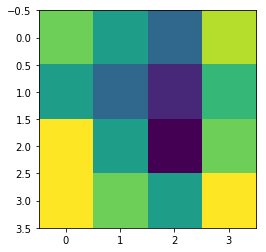

In [24]:
plt.imshow(square)
plt.show()

In [27]:
print [sum(row) for row in square]

[19, 11, 17, 26]
[19, 11, 17, 26]


In [31]:
rot = [[square[i][j] for i in xrange(4)] for j in xrange(4)]

In [32]:
print [sum(row) for row in rot]

[26, 16, 5, 26]


In [102]:
def state(l):
    return tuple([sorted(l[:i+1]).index(l[i]) for i in xrange(1,4)])

In [44]:
l = [100, 1, 10, 1000]
state(l)

(0, 1, 3)

In [101]:
state(run())

(1, 1, 1)

In [21]:
def run(p=0.5):
    wins = [0,0]
    while 4 not in wins:
        if random.random() < p:
            wins[0] += 1
        else:
            wins[1] += 1
    return sum(wins)

### 50% chance

In [23]:
l = [ run() for i in xrange(100000) ]

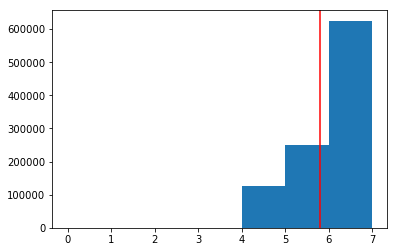

Expected number of games for 50% chance: 5.814032


In [51]:
plt.hist(l, bins=range(0,8))
# Mean
# plt.axvline(np.mean(l), color='red') 
plt.axvline(np.mean(l), color='red') 
plt.show()
print 'Expected number of games for 50% chance:', np.mean(l)

### EV vs p

In [24]:
def sim(p=0.5, n=100000):
    l = [ run(p) for i in xrange(n) ]
    return np.mean(l)

In [47]:
x = [ x/10.0 for x in xrange(5,11)]
y = [ sim(p, 10000000) for p in x ]

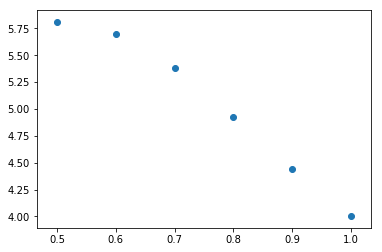

In [48]:
plt.scatter(x, y)
plt.show()

In [52]:
print 'Probability, Expected number of games'
for a, b in zip(x, y):
    print a, b

Probability, Expected number of games
0.5 5.8120853
0.6 5.6973553
0.7 5.3777923
0.8 4.9264639
0.9 4.4394049
1.0 4.0
